# Basic Exploratory Data Analysis (EDA) of the House Prices dataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('datasets/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.drop(columns=['Id'], inplace=True)
target_column = 'SalePrice'
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
def suggest_num_columns_dtypes(df):
    signed_int_dtypes = [np.int8, np.int16, np.int32, np.int64]
    unsigned_int_dtypes = [np.uint8, np.uint16, np.uint32, np.uint64]
    float_dtypes = [np.float16, np.float32, np.float64]

    result = {}
    for column in df.columns:
        assigned_type = df[column].dtype
        if assigned_type != 'object':
            min_value = df[column].min()
            max_value = df[column].max()
            if assigned_type in signed_int_dtypes:
                check_function = np.iinfo
                if min_value >= 0:
                    check_list = unsigned_int_dtypes
                else:
                    check_list = signed_int_dtypes
            elif assigned_type in float_dtypes:
                check_function = np.finfo
                check_list = float_dtypes
            
            for idx in range(len(check_list)):
                if max_value < check_function(check_list[idx]).max:
                    result[column] = check_list[idx]
                    break
    return result

In [14]:
suggest_num_columns_dtypes(df)

{'Id': numpy.uint16,
 'MSSubClass': numpy.uint8,
 'LotFrontage': numpy.float16,
 'LotArea': numpy.uint32,
 'OverallQual': numpy.uint8,
 'OverallCond': numpy.uint8,
 'YearBuilt': numpy.uint16,
 'YearRemodAdd': numpy.uint16,
 'MasVnrArea': numpy.float16,
 'BsmtFinSF1': numpy.uint16,
 'BsmtFinSF2': numpy.uint16,
 'BsmtUnfSF': numpy.uint16,
 'TotalBsmtSF': numpy.uint16,
 '1stFlrSF': numpy.uint16,
 '2ndFlrSF': numpy.uint16,
 'LowQualFinSF': numpy.uint16,
 'GrLivArea': numpy.uint16,
 'BsmtFullBath': numpy.uint8,
 'BsmtHalfBath': numpy.uint8,
 'FullBath': numpy.uint8,
 'HalfBath': numpy.uint8,
 'BedroomAbvGr': numpy.uint8,
 'KitchenAbvGr': numpy.uint8,
 'TotRmsAbvGrd': numpy.uint8,
 'Fireplaces': numpy.uint8,
 'GarageYrBlt': numpy.float16,
 'GarageCars': numpy.uint8,
 'GarageArea': numpy.uint16,
 'WoodDeckSF': numpy.uint16,
 'OpenPorchSF': numpy.uint16,
 'EnclosedPorch': numpy.uint16,
 '3SsnPorch': numpy.uint16,
 'ScreenPorch': numpy.uint16,
 'PoolArea': numpy.uint16,
 'MiscVal': numpy.uint16

In [15]:
df_opt = df.copy()

In [16]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
opt_column_types = suggest_num_columns_dtypes(df_opt)

In [20]:
df_opt = df_opt.astype(opt_column_types)
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   uint16 
 1   MSSubClass     1460 non-null   uint8  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float16
 4   LotArea        1460 non-null   uint32 
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   uint8  
 18  OverallC

-37% of memory consumption. Not bad. Even if it's not very large dataset.

In [21]:
df = df_opt
df_opt = None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   uint16 
 1   MSSubClass     1460 non-null   uint8  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float16
 4   LotArea        1460 non-null   uint32 
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   uint8  
 18  OverallC

In [27]:
nan_ratios = {}
for column in df.columns:
    ratio = np.round(df[column].isna().sum() * 100 / len(df[column]), decimals=2)
    if ratio > 0:
        nan_ratios[column] = ratio
nan_ratios

{'LotFrontage': 17.74,
 'Alley': 93.77,
 'MasVnrType': 0.55,
 'MasVnrArea': 0.55,
 'BsmtQual': 2.53,
 'BsmtCond': 2.53,
 'BsmtExposure': 2.6,
 'BsmtFinType1': 2.53,
 'BsmtFinType2': 2.6,
 'Electrical': 0.07,
 'FireplaceQu': 47.26,
 'GarageType': 5.55,
 'GarageYrBlt': 5.55,
 'GarageFinish': 5.55,
 'GarageQual': 5.55,
 'GarageCond': 5.55,
 'PoolQC': 99.52,
 'Fence': 80.75,
 'MiscFeature': 96.3}

In [28]:
df.fillna(value={'Alley': 'NoAly', 'PoolQC': 'NoPool', 'Fence': 'NoFence'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   uint16 
 1   MSSubClass     1460 non-null   uint8  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float16
 4   LotArea        1460 non-null   uint32 
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   uint8  
 18  OverallC

In [29]:
df['Alley'].value_counts()

NoAly    1369
Grvl       50
Pave       41
Name: Alley, dtype: int64

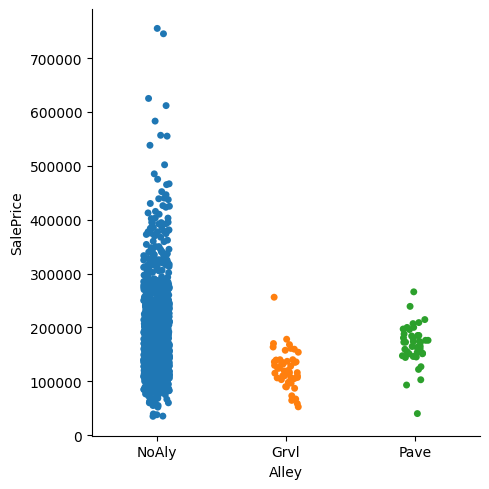

In [30]:
sns.catplot(data=df, x='Alley', y='SalePrice')

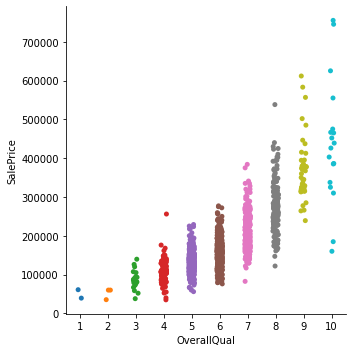

In [22]:
sns.catplot(data=df, x='OverallQual', y='SalePrice')

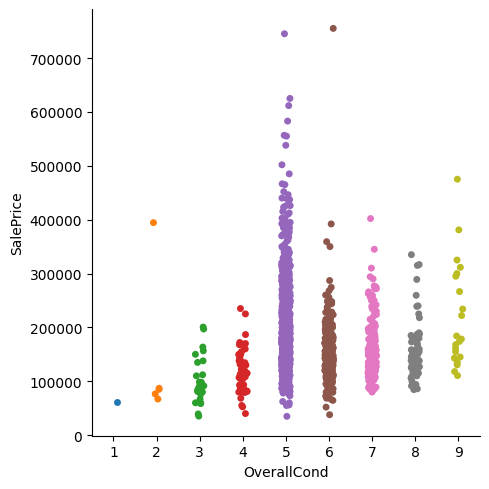

In [23]:
sns.catplot(data=df, x='OverallCond', y='SalePrice')

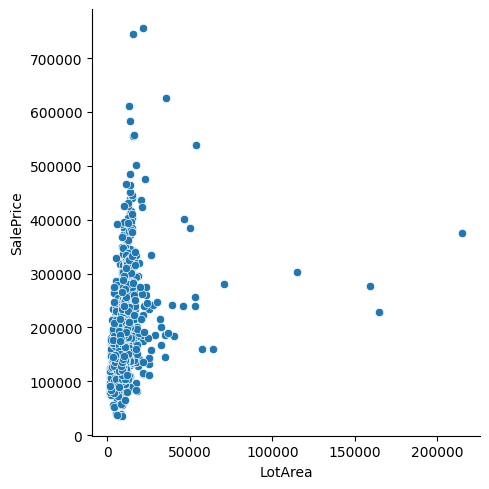

In [24]:
sns.relplot(data=df, x='LotArea', y='SalePrice')